# OpenMMLabCamp Homework I rtmpose

In [3]:
import os

In [4]:
os.chdir("../mmpose")
!pwd

/home/elsa/Workspace/OpenMMLab/mmpose


## Trainning

In [ ]:
## running in command line
!python tools/train.py ../hw1/rtmpose-s-ear.py

## Testing

In [5]:
!python tools/test.py ../hw1/work_dirs/rtmpose_s_ear/rtmpose-s-ear.py \
                      ../hw1/work_dirs/rtmpose_s_ear/best_PCK_epoch_290.pth

06/04 23:18:26 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.16 (default, Mar  2 2023, 03:21:46) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: NVIDIA GeForce RTX 2070
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.7, V11.7.64
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04.1) 11.3.0
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code

## Simplify Model

In [4]:
# RTMPose - tiny
!python tools/misc/publish_model.py \
        ../hw1/work_dirs/rtmpose_s_ear/best_PCK_epoch_290.pth \
        ../hw1/checkpoint/rtmpose_s_ear_20230604050948.pth

06/04 22:33:40 - mmengine - INFO - Key `message_hub` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 22:33:40 - mmengine - INFO - Key `ema_state_dict` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.


## Test Model

In [6]:
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        ../hw1/work_dirs/rtmdet_tiny_ear/rtmdet_tiny_ear.py \
        ../hw1/checkpoint/rtmdet_tiny_ear_epoch_200_20230604031250-5af168f0.pth \
        ../hw1/work_dirs/rtmpose_s_ear/rtmpose-s-ear.py \
        ../hw1/checkpoint/rtmpose_s_ear_20230604050948-2c960cd9_20230604.pth \
        --input ../hw1/test/613056531.jpg \
        --output-root ../hw1/outputs/G2_RTMDet-RTMPose \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 36 \
        --thickness 30 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: ../hw1/checkpoint/rtmdet_tiny_ear_epoch_200_20230604031250-5af168f0.pth
Loads checkpoint by local backend from path: ../hw1/checkpoint/rtmpose_s_ear_20230604050948-2c960cd9_20230604.pth
06/04 22:38:56 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/elsa/anaconda3/envs/mmlab/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/elsa/Workspace/OpenMMLab/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '


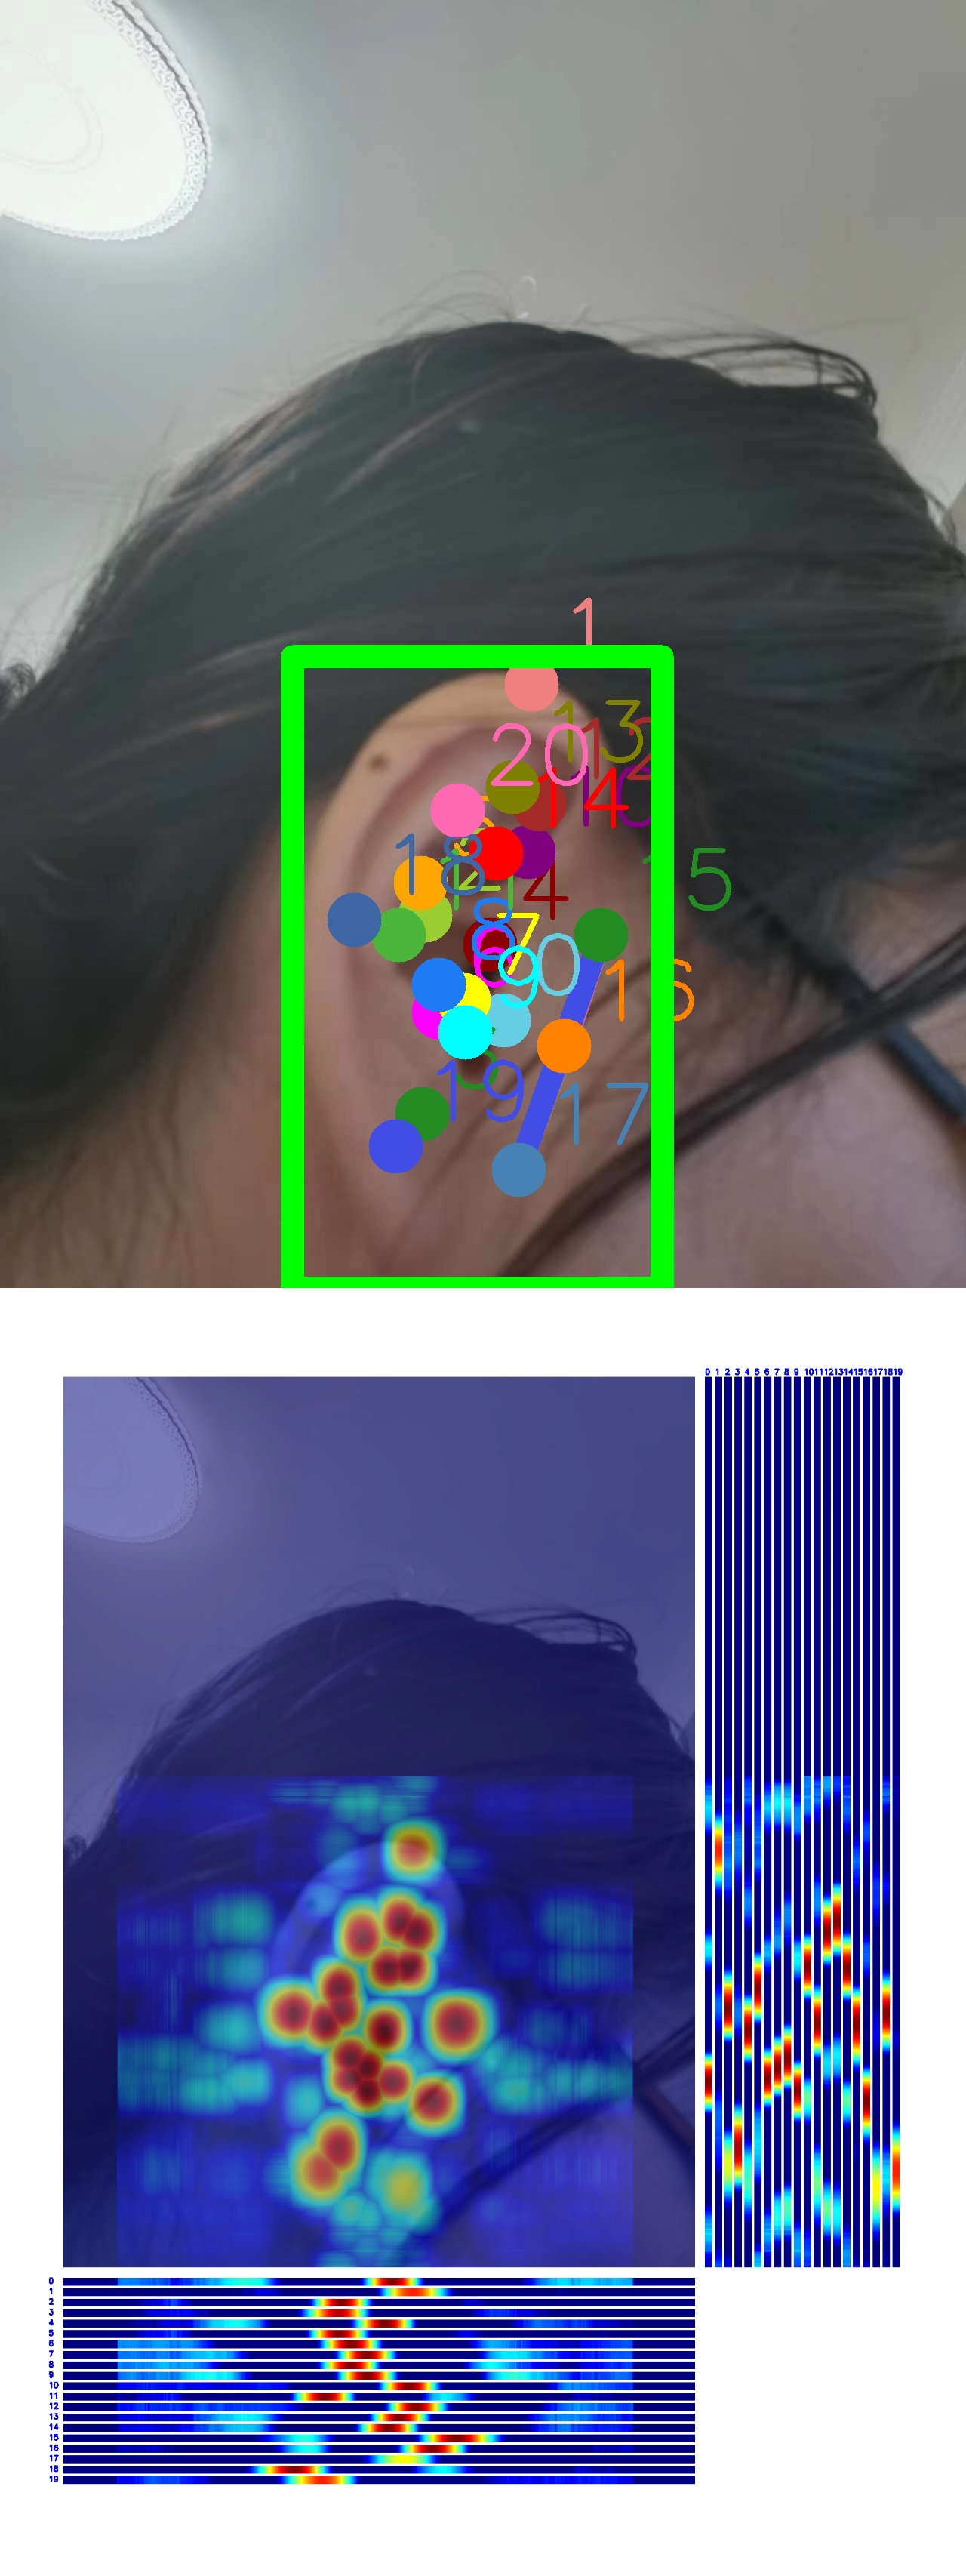

In [7]:
from IPython.display import Image 
pil_img = Image(filename='../hw1/outputs/G2_RTMDet-RTMPose/613056531.jpg')
display(pil_img)

In [4]:
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        ../hw1/work_dirs/rtmdet_tiny_ear/rtmdet_tiny_ear.py \
        ../hw1/checkpoint/rtmdet_tiny_ear_epoch_200_20230604031250-5af168f0.pth \
        ../hw1/work_dirs/rtmpose_s_ear/rtmpose-s-ear.py \
        ../hw1/checkpoint/rtmpose_s_ear_20230604050948-2c960cd9_20230604.pth \
        --input ../hw1/test/hw1_video.mp4 \
        --output-root ../hw1/outputs/G2_Video \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 16 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: ../hw1/checkpoint/rtmdet_tiny_ear_epoch_200_20230604031250-5af168f0.pth
Loads checkpoint by local backend from path: ../hw1/checkpoint/rtmpose_s_ear_20230604050948-2c960cd9_20230604.pth
06/04 22:51:51 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/elsa/anaconda3/envs/mmlab/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/elsa/Workspace/OpenMMLab/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normalized for '
/home/elsa/Workspace/Open

# Visualisation

In [8]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
log_path = '../hw1/work_dirs/rtmpose_s_ear/20230604_123445/vis_data/scalars.json'

In [10]:
with open(log_path, 'r') as f:
    json_list = f.readlines()
    
len(json_list)

1830

In [11]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for l in tqdm(json_list):
    if 'coco/AP' in l:
        df_test = df_test.append(eval(l), ignore_index = True)
    else:
        df_train = df_train.append(eval(l), ignore_index = True)

100%|█████████████████████████████████████| 1830/1830 [00:00<00:00, 1848.30it/s]


In [ ]:
df_train.to_csv("../hw1/rtmpose_train.csv", index = False)
df_test.to_csv("../hw1/rtmpose_test.csv", index = False)

In [12]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [13]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'memory', 'step'],
      dtype='object')

In [14]:
metrics = ['acc_pose']

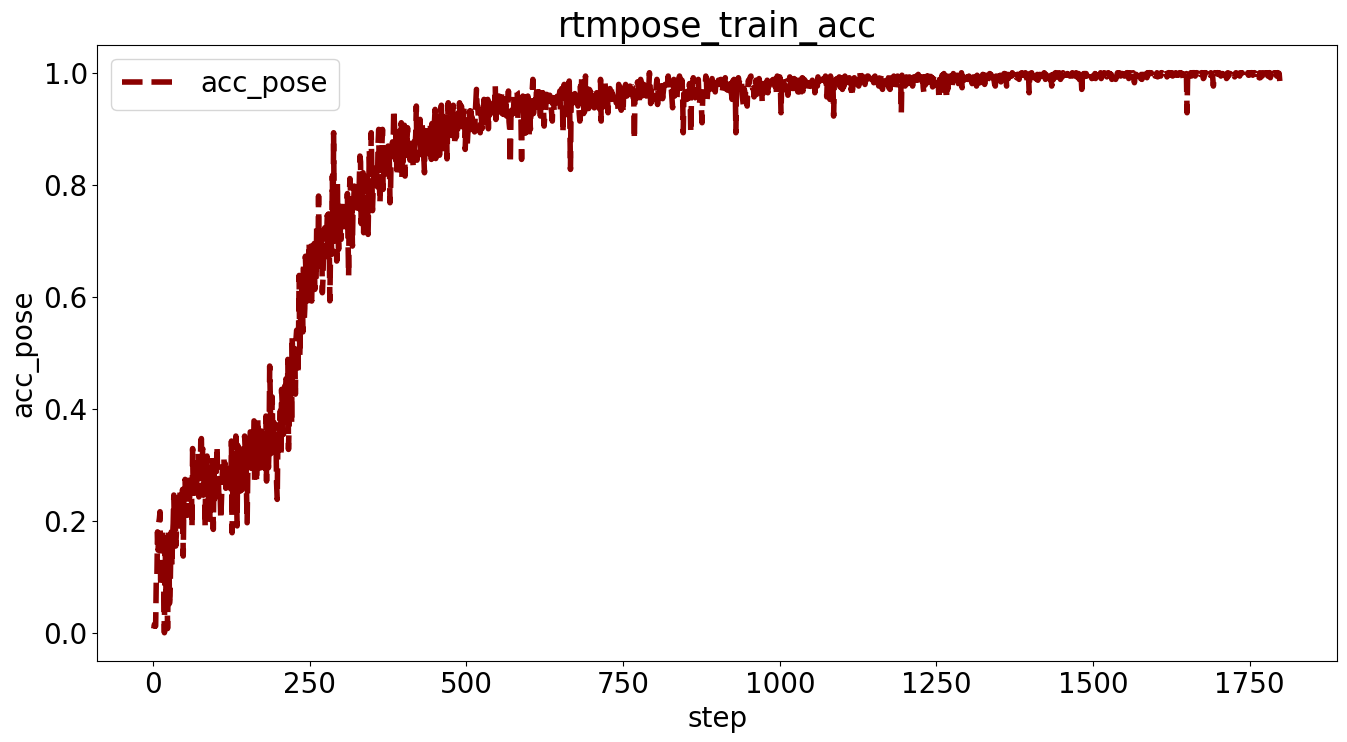

In [16]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('acc_pose', fontsize=20)
plt.title('rtmpose_train_acc', fontsize=25)
# plt.savefig('../hw1/rtmpose_train_acc.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()


In [18]:
metrics = ['loss', 'loss_kpt']

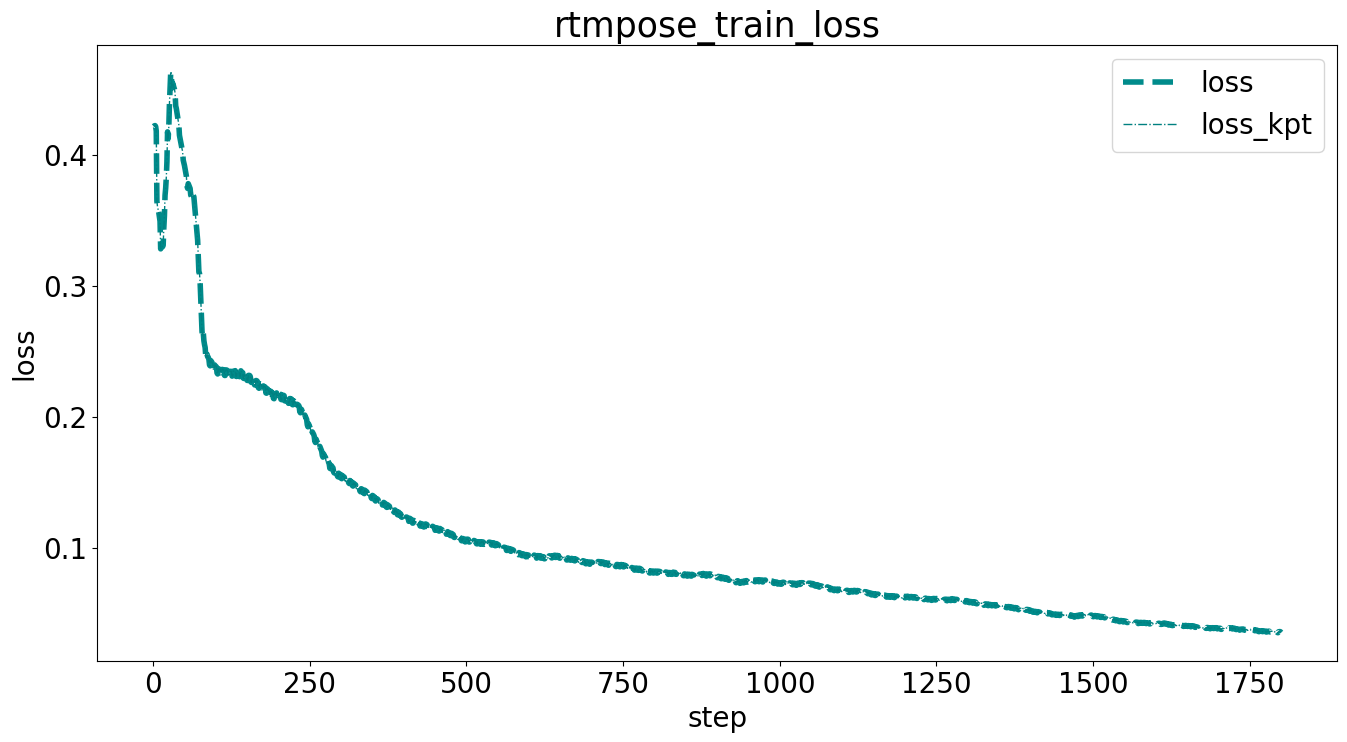

In [19]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('rtmpose_train_loss', fontsize=25)
# plt.savefig('../hw1/rtmpose_train_acc.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [22]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [23]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']

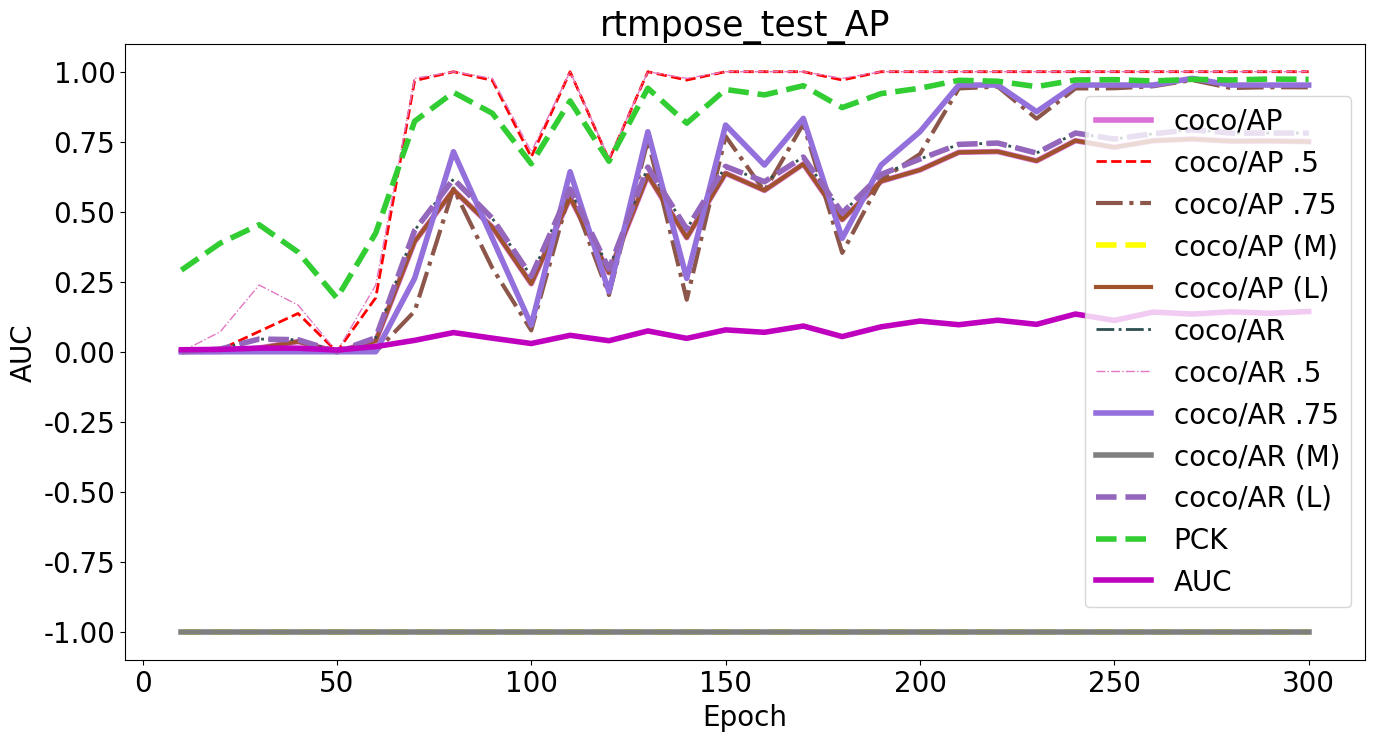

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('rtmpose_test_AP', fontsize=25)
# plt.savefig('../hw1/rtmpose_test_.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

In [25]:
metrics = ['NME']

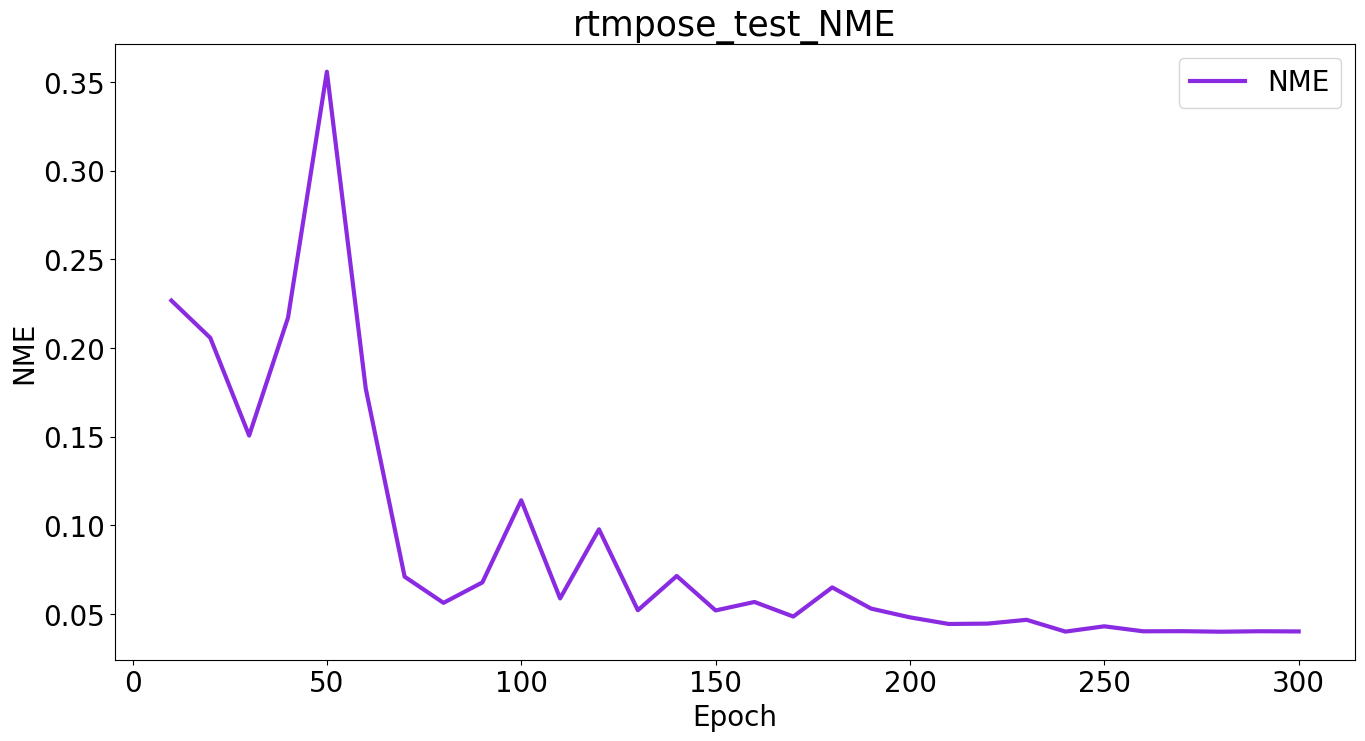

In [26]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('rtmpose_test_NME', fontsize=25)
# plt.savefig('../hw1/rtmpose_test_.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()